In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#If the CSV file is in the same folder as your Jupyter Notebook
data = pd.read_csv(r"C:\Users\user\Downloads\candidates.csv")


# Display the first 5 rows to check if the data loaded correctly
data.head()

party                 name date_announced date_withdrawn
0     democrat        Dean Phillips     10/26/2023       3/6/2024
1     democrat  Marianne Williamson       3/4/2023       2/7/2024
2     democrat            Joe Biden      4/25/2023       7/2/2024
3     democrat        Kamala Harris       7/1/2024            NaN
4  independent          Cornel West       6/5/2023            NaN

In [16]:
# Basic information about the dataset
data.info()

# Descriptive statistics of the data
data.describe()

# Check for missing values in the dataset
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   party           21 non-null     object
 1   name            21 non-null     object
 2   date_announced  21 non-null     object
 3   date_withdrawn  16 non-null     object
dtypes: object(4)
memory usage: 804.0+ bytes


party             0
name              0
date_announced    0
date_withdrawn    5
dtype: int64

In [18]:
# Fill missing values with 'Not Available'
data['date_withdrawn'] = data['date_withdrawn'].fillna('Not Available')

# Or, drop rows with missing values in the 'date_withdrawn' column
data.dropna(subset=['date_withdrawn'], inplace=True)

In [20]:
data['date_announced'] = pd.to_datetime(data['date_announced'], errors='coerce')
data['date_withdrawn'] = pd.to_datetime(data['date_withdrawn'], errors='coerce')

In [22]:
# Check for unique values in the columns
data['party'].unique()
data['name'].unique()

# Check the number of entries by party
party_counts = data['party'].value_counts()
print(party_counts)

party
republican     13
democrat        4
independent     2
libertarian     1
green           1
Name: count, dtype: int64


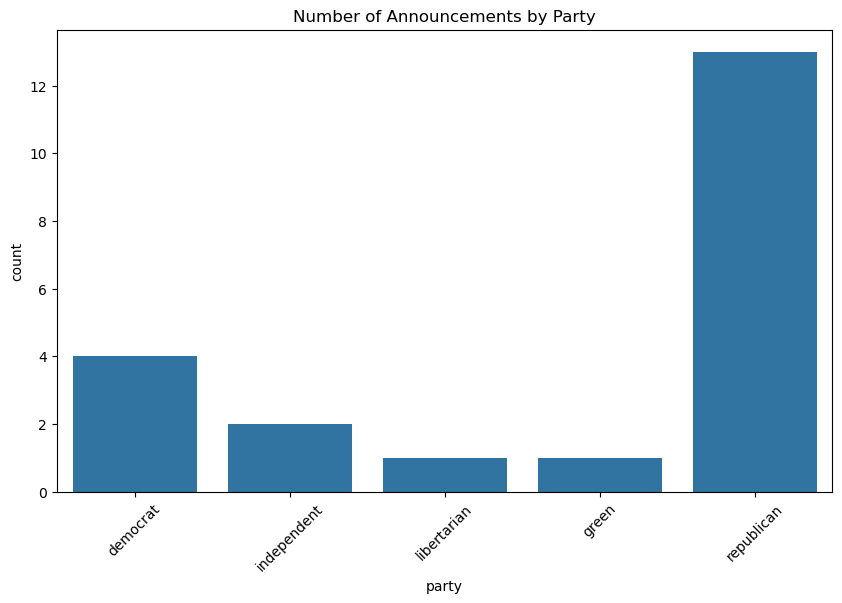

In [24]:
# Bar plot for the distribution of announcements by party
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='party')
plt.title('Number of Announcements by Party')
plt.xticks(rotation=45)
plt.show()

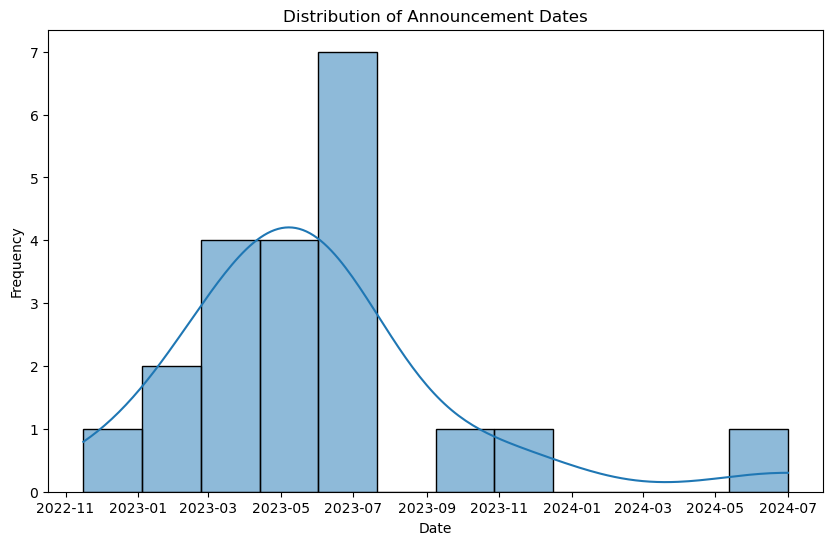

In [26]:
# Histogram for the distribution of 'date_announced'
plt.figure(figsize=(10, 6))
sns.histplot(data['date_announced'], kde=True)
plt.title('Distribution of Announcement Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

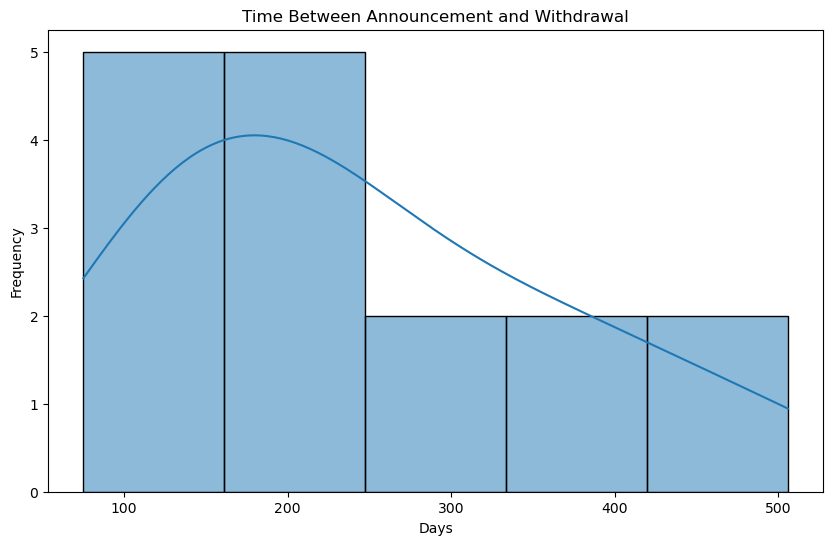

In [28]:
# Calculate the time difference between the announcement and withdrawal
data['withdrawal_duration'] = (data['date_withdrawn'] - data['date_announced']).dt.days

# Histogram of the duration between announcement and withdrawal
plt.figure(figsize=(10, 6))
sns.histplot(data['withdrawal_duration'], kde=True)
plt.title('Time Between Announcement and Withdrawal')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

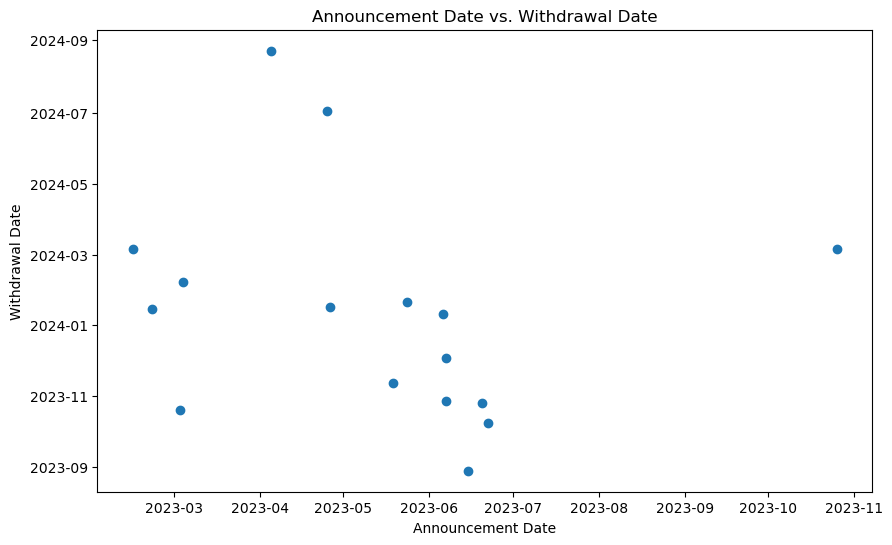

In [30]:
# Scatter plot for announcement date vs. withdrawal date
plt.figure(figsize=(10, 6))
plt.scatter(data['date_announced'], data['date_withdrawn'])
plt.title('Announcement Date vs. Withdrawal Date')
plt.xlabel('Announcement Date')
plt.ylabel('Withdrawal Date')
plt.show()

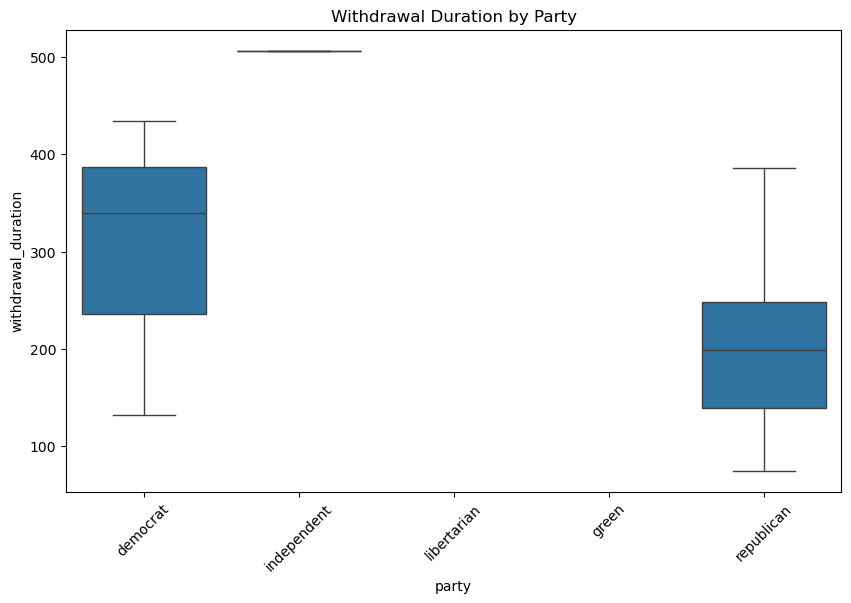

In [32]:
# Boxplot for the withdrawal duration by party
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='party', y='withdrawal_duration')
plt.title('Withdrawal Duration by Party')
plt.xticks(rotation=45)
plt.show()

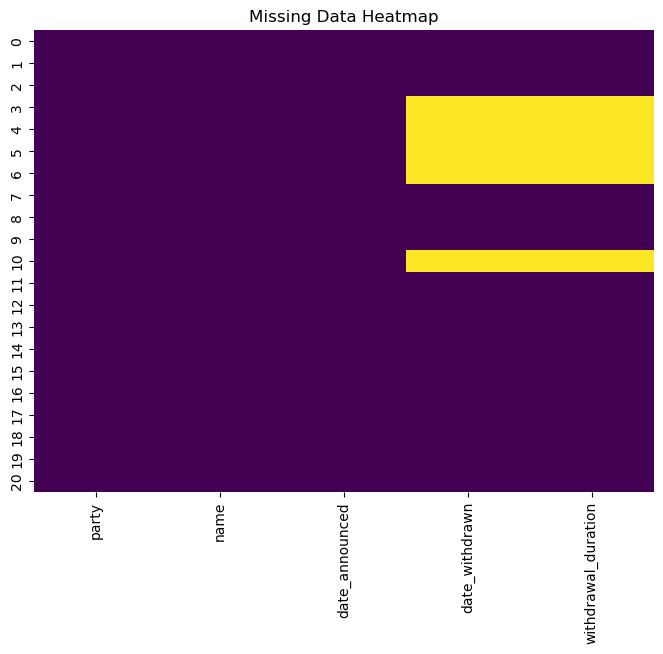

In [34]:
# Heatmap to visualize missing data
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

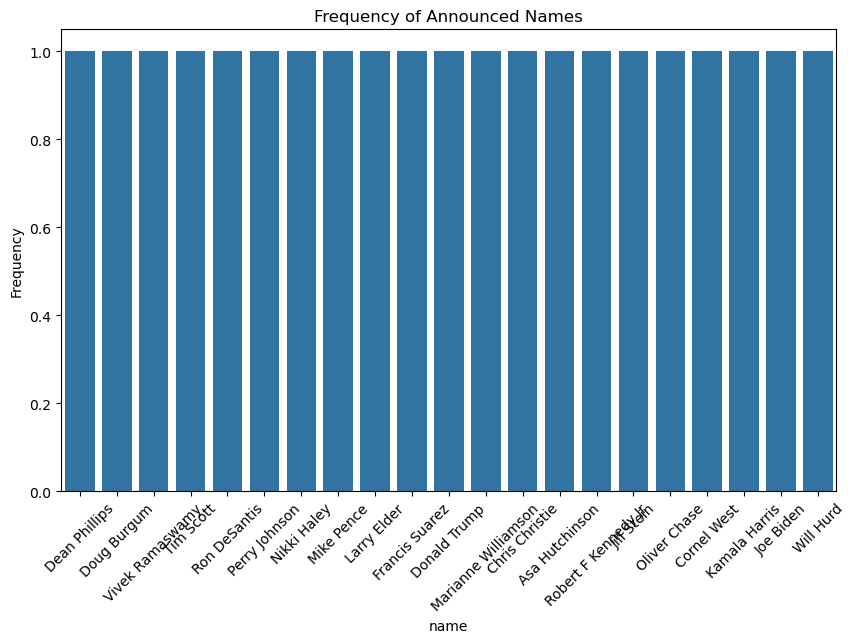

In [36]:
# Count the occurrences of each name
name_counts = data['name'].value_counts()

# Bar plot for the most frequent names
plt.figure(figsize=(10, 6))
sns.barplot(x=name_counts.index, y=name_counts.values)
plt.title('Frequency of Announced Names')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

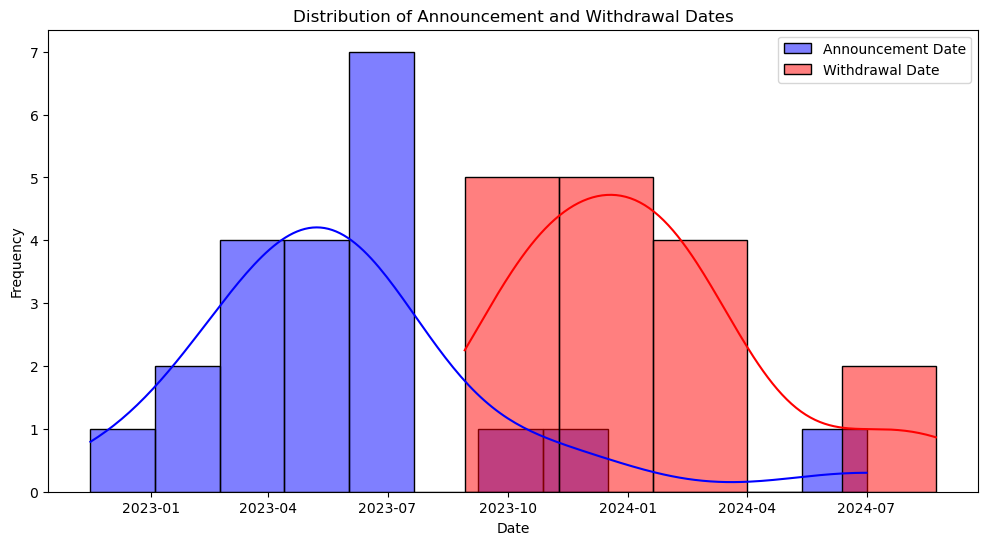

In [38]:
# Plot both the announced and withdrawn dates
plt.figure(figsize=(12, 6))

# Plot announcement dates
sns.histplot(data['date_announced'], color='blue', kde=True, label='Announcement Date')

# Plot withdrawal dates
sns.histplot(data['date_withdrawn'], color='red', kde=True, label='Withdrawal Date')

plt.legend()
plt.title('Distribution of Announcement and Withdrawal Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

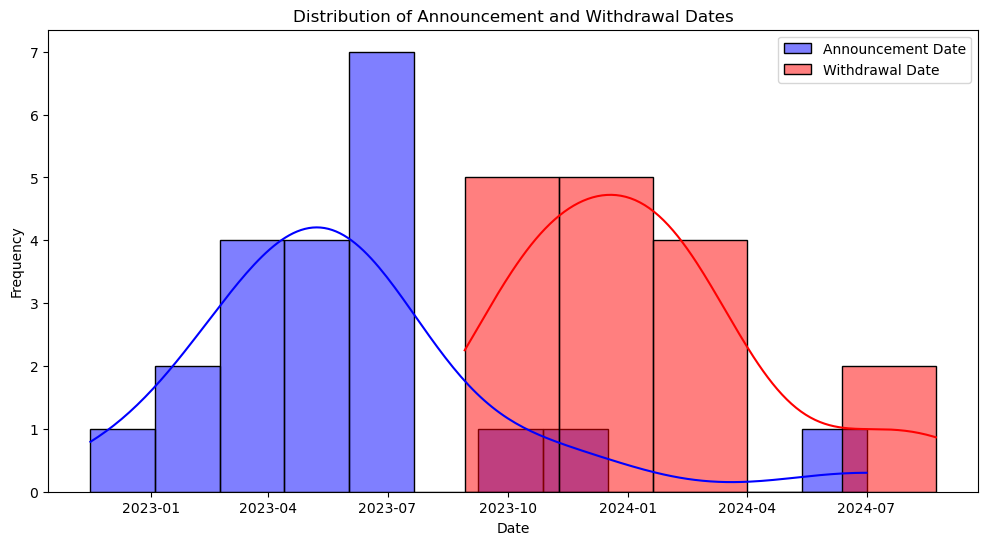

In [40]:
# Plot both the announced and withdrawn dates
plt.figure(figsize=(12, 6))

# Plot announcement dates
sns.histplot(data['date_announced'], color='blue', kde=True, label='Announcement Date')

# Plot withdrawal dates
sns.histplot(data['date_withdrawn'], color='red', kde=True, label='Withdrawal Date')

plt.legend()
plt.title('Distribution of Announcement and Withdrawal Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Sorting the data by withdrawal date to get the last withdrawals
last_withdrawals = data.sort_values('date_withdrawn', ascending=False)

# Displaying the last 5 rows with the most recent withdrawals
last_withdrawals.head()

party                 name date_announced date_withdrawn  \
7   independent  Robert F Kennedy Jr     2023-04-05     2024-08-23   
2      democrat            Joe Biden     2023-04-25     2024-07-02   
0      democrat        Dean Phillips     2023-10-26     2024-03-06   
15   republican          Nikki Haley     2023-02-14     2024-03-06   
1      democrat  Marianne Williamson     2023-03-04     2024-02-07   

    withdrawal_duration  
7                 506.0  
2                 434.0  
0                 132.0  
15                386.0  
1                 340.0

In [44]:
# Calculate the correlation between the announcement and withdrawal dates
data['announcement_timestamp'] = data['date_announced'].astype(np.int64) // 10**9
data['withdrawal_timestamp'] = data['date_withdrawn'].astype(np.int64) // 10**9

correlation = data['announcement_timestamp'].corr(data['withdrawal_timestamp'])

print(f"Correlation between announcement and withdrawal dates: {correlation}")

Correlation between announcement and withdrawal dates: -0.2935837198766084


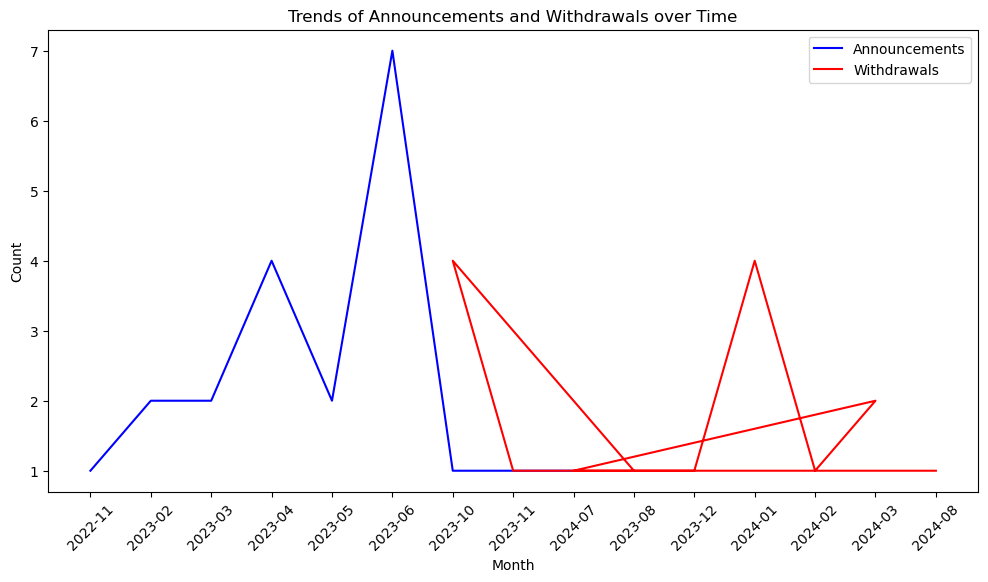

In [46]:
# Group the data by month and count the number of announcements and withdrawals
data['month_announced'] = data['date_announced'].dt.to_period('M')
data['month_withdrawn'] = data['date_withdrawn'].dt.to_period('M')

# Count the number of announcements and withdrawals per month
announcements_per_month = data['month_announced'].value_counts().sort_index()
withdrawals_per_month = data['month_withdrawn'].value_counts().sort_index()

# Plot both trends
plt.figure(figsize=(12, 6))
plt.plot(announcements_per_month.index.astype(str), announcements_per_month.values, label='Announcements', color='blue')
plt.plot(withdrawals_per_month.index.astype(str), withdrawals_per_month.values, label='Withdrawals', color='red')

plt.title('Trends of Announcements and Withdrawals over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

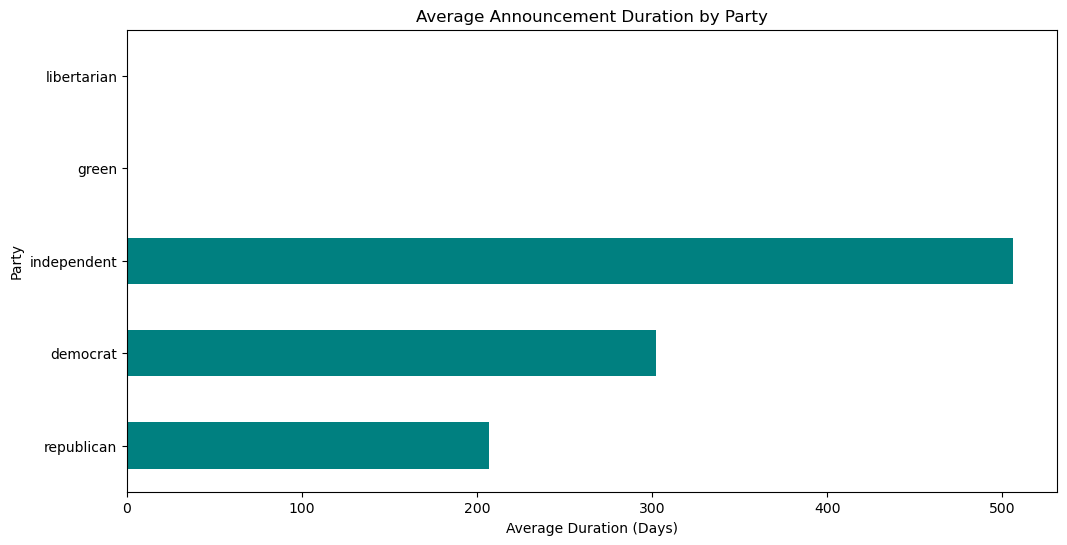

In [48]:
# Calculate the duration between announcement and withdrawal for each record
data['announcement_duration'] = (data['date_withdrawn'] - data['date_announced']).dt.days

# Group by party and calculate mean announcement duration
party_duration = data.groupby('party')['announcement_duration'].mean()

# Bar plot to compare announcement durations by party
plt.figure(figsize=(12, 6))
party_duration.sort_values().plot(kind='barh', color='teal')
plt.title('Average Announcement Duration by Party')
plt.xlabel('Average Duration (Days)')
plt.ylabel('Party')
plt.show()

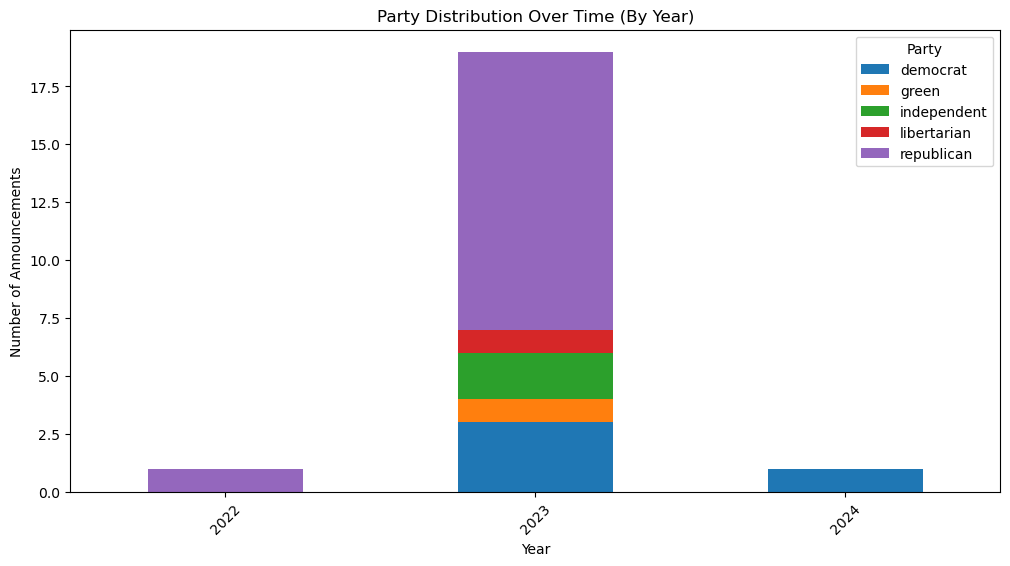

In [50]:
# Extract year and month from announcement date
data['year_announced'] = data['date_announced'].dt.year
data['month_announced'] = data['date_announced'].dt.month

# Group by year and party and count the number of announcements per year
party_year_distribution = data.groupby(['year_announced', 'party']).size().unstack().fillna(0)

# Plot the party distribution over time
party_year_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Party Distribution Over Time (By Year)')
plt.xlabel('Year')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.show()

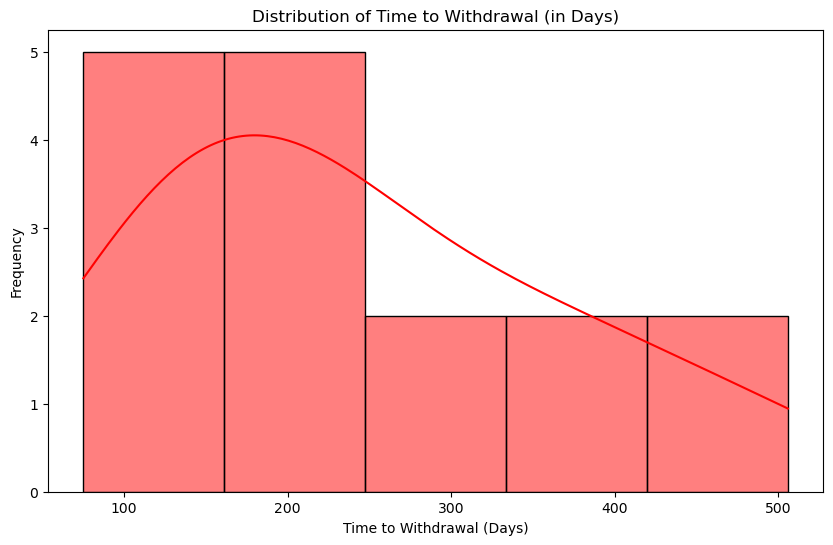

In [52]:
# Calculate the time difference in days between 'date_announced' and 'date_withdrawn'
data['time_to_withdraw'] = (data['date_withdrawn'] - data['date_announced']).dt.days

# Plot the distribution of time to withdrawal for each record
plt.figure(figsize=(10, 6))
sns.histplot(data['time_to_withdraw'], kde=True, color='red')
plt.title('Distribution of Time to Withdrawal (in Days)')
plt.xlabel('Time to Withdrawal (Days)')
plt.ylabel('Frequency')
plt.show()

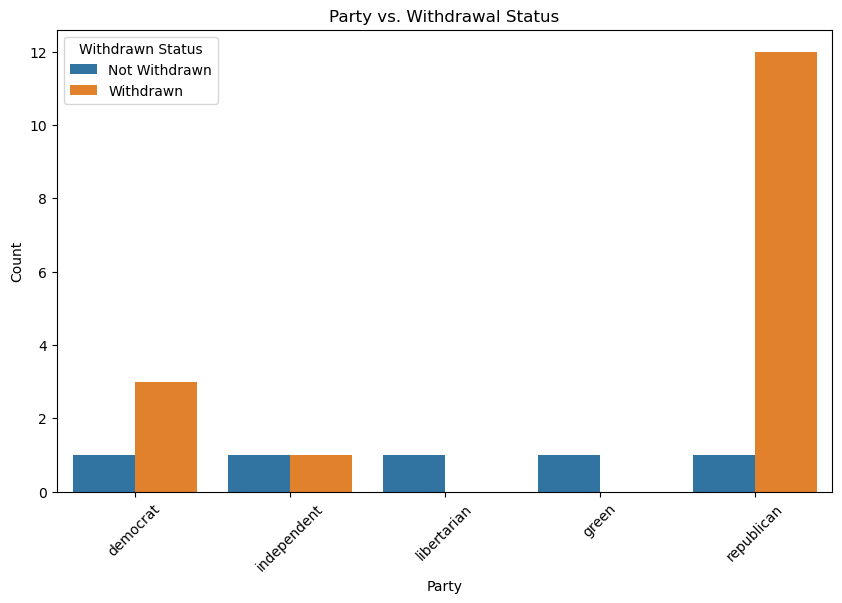

In [54]:
# Create a column to check if an announcement was withdrawn (non-null 'date_withdrawn')
data['withdrawn_status'] = data['date_withdrawn'].notnull()

# Visualize withdrawal status by party
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='party', hue='withdrawn_status')
plt.title('Party vs. Withdrawal Status')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Withdrawn Status', labels=['Not Withdrawn', 'Withdrawn'])
plt.show()

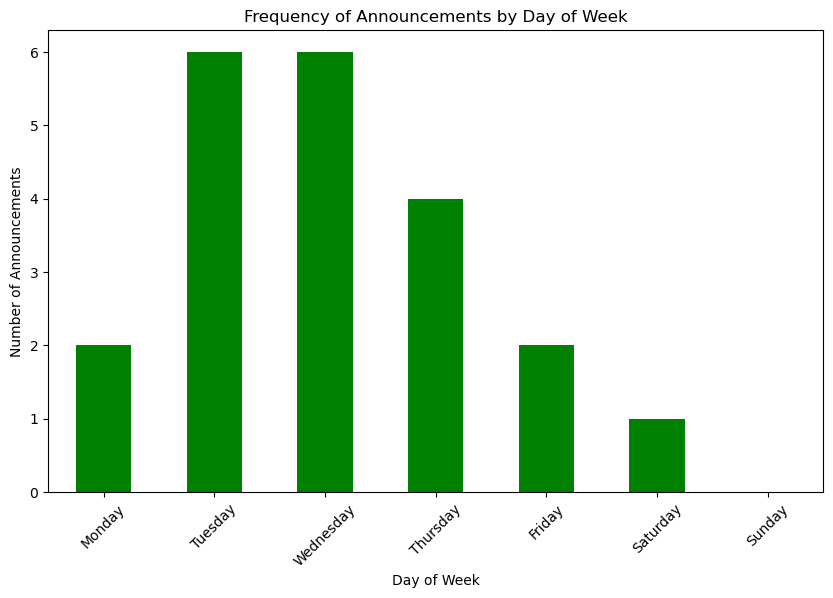

In [58]:
# Count how many announcements were made on each day of the week
day_of_week_counts = data['day_of_week'].value_counts()

# Define the correct order of the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the day_of_week_counts to include all days, filling missing days with 0
day_of_week_counts = day_of_week_counts.reindex(days_of_week, fill_value=0)

# Bar plot for the frequency of announcements by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='green')
plt.title('Frequency of Announcements by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=45)
plt.show()

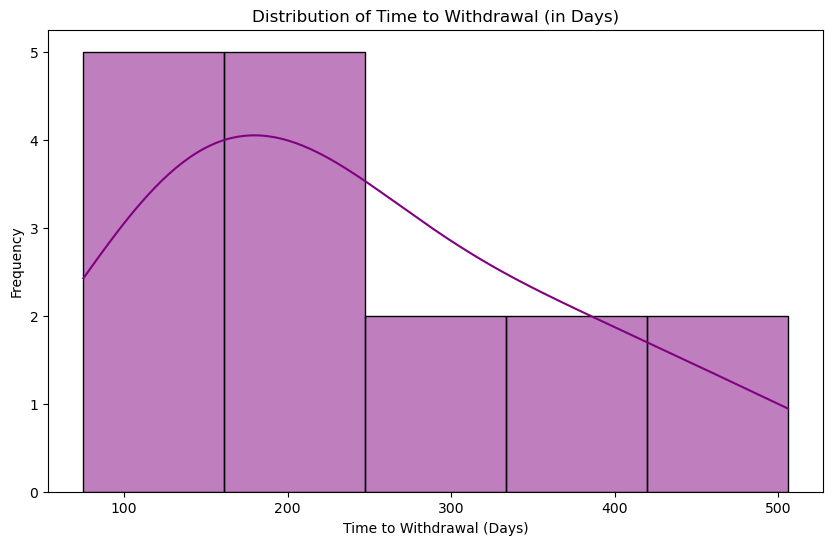

In [60]:
# Calculate the time difference in days between 'date_announced' and 'date_withdrawn'
data['time_to_withdraw'] = (data['date_withdrawn'] - data['date_announced']).dt.days

# Plot the distribution of time_to_withdraw
plt.figure(figsize=(10, 6))
sns.histplot(data['time_to_withdraw'], kde=True, color='purple')
plt.title('Distribution of Time to Withdrawal (in Days)')
plt.xlabel('Time to Withdrawal (Days)')
plt.ylabel('Frequency')
plt.show()

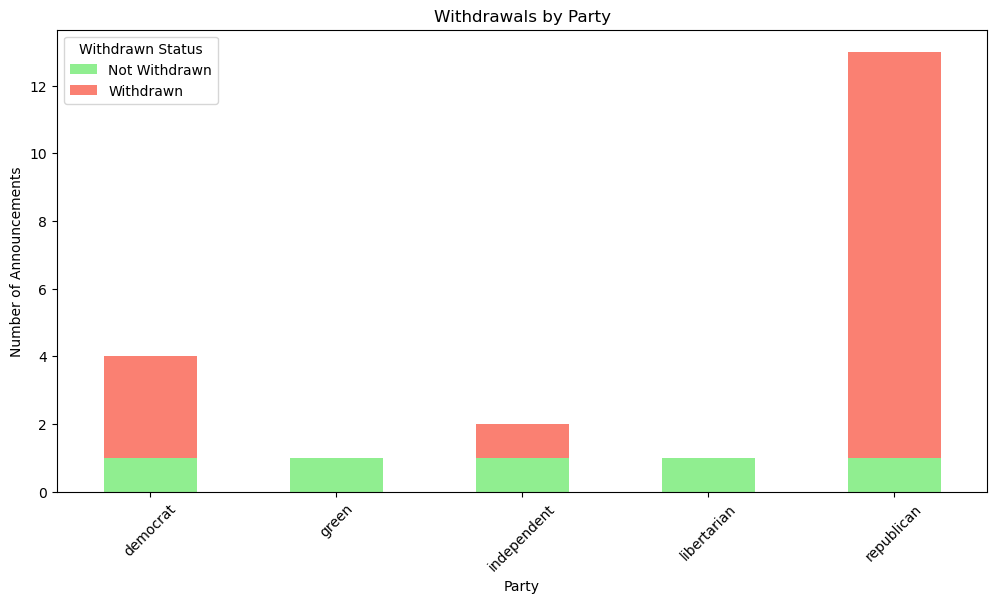

In [62]:
# Create a new column to indicate whether an announcement was withdrawn
data['withdrawn'] = data['date_withdrawn'].notnull()

# Count the number of withdrawn and non-withdrawn announcements by party
withdrawals_by_party = data.groupby('party')['withdrawn'].value_counts().unstack().fillna(0)

# Plotting the withdrawal count for each party
withdrawals_by_party.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgreen', 'salmon'])
plt.title('Withdrawals by Party')
plt.xlabel('Party')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=45)
plt.legend(title='Withdrawn Status', labels=['Not Withdrawn', 'Withdrawn'])
plt.show()

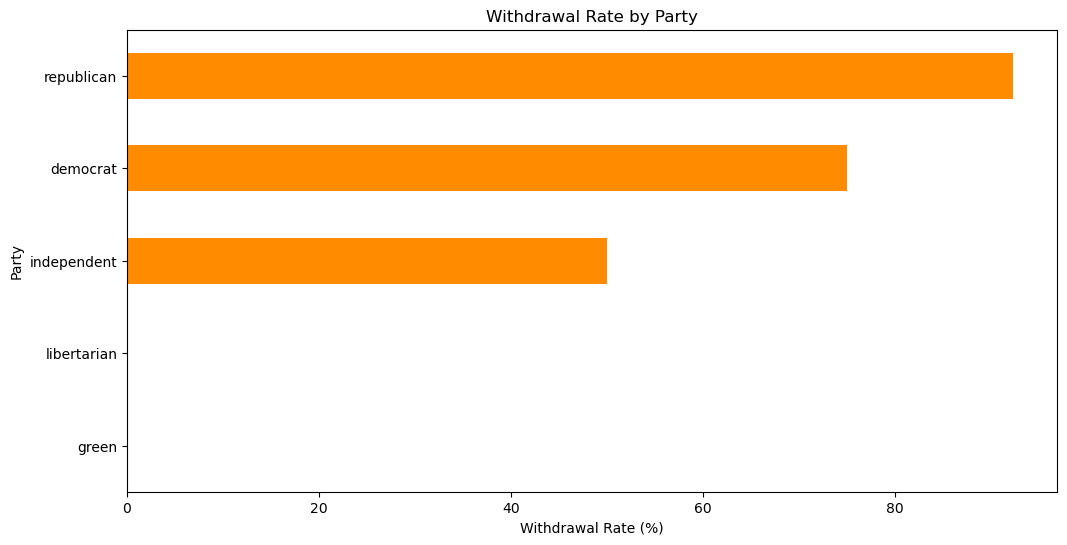

In [64]:
# Calculate the withdrawal rate by party
withdrawal_rate = data.groupby('party')['withdrawn'].mean() * 100

# Bar plot for withdrawal rate by party
plt.figure(figsize=(12, 6))
withdrawal_rate.sort_values().plot(kind='barh', color='darkorange')
plt.title('Withdrawal Rate by Party')
plt.xlabel('Withdrawal Rate (%)')
plt.ylabel('Party')
plt.show()

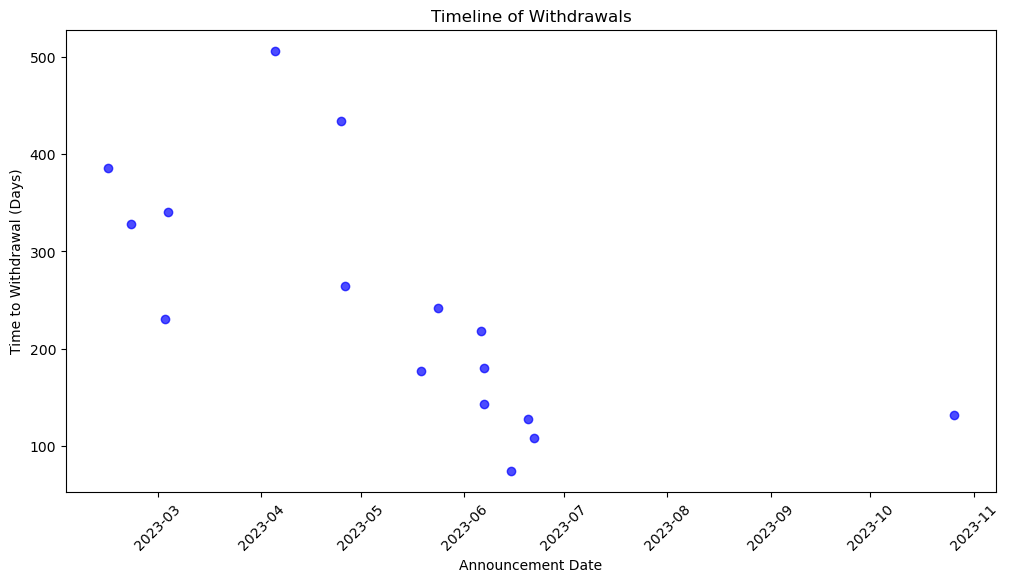

In [66]:
# Create a scatter plot for the withdrawal events over time
plt.figure(figsize=(12, 6))
plt.scatter(data['date_announced'], data['time_to_withdraw'], alpha=0.7, color='blue')
plt.title('Timeline of Withdrawals')
plt.xlabel('Announcement Date')
plt.ylabel('Time to Withdrawal (Days)')
plt.xticks(rotation=45)
plt.show()

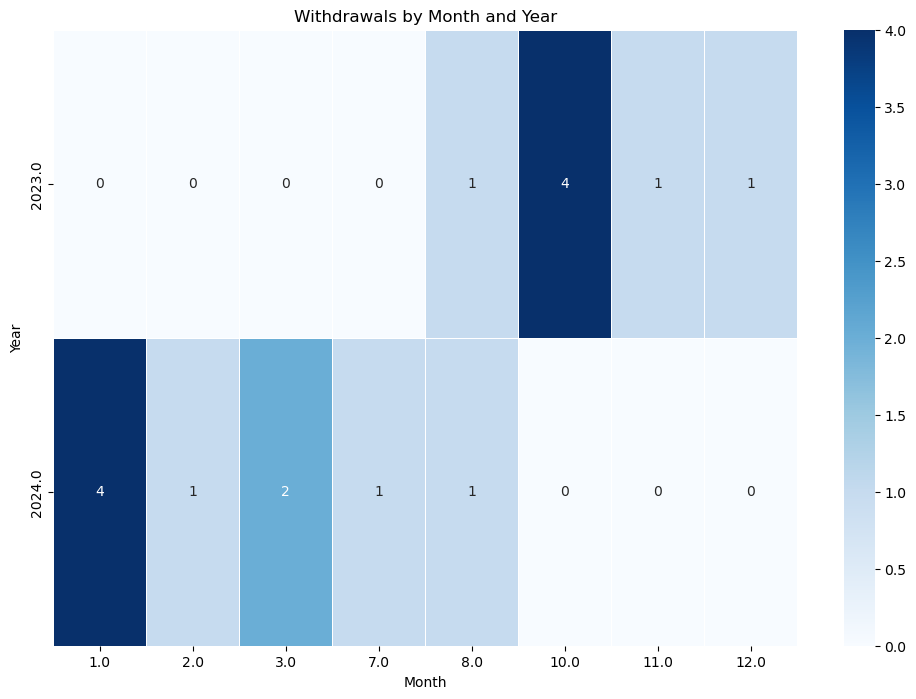

In [68]:
# Extract year and month from 'date_withdrawn'
data['year_withdrawn'] = data['date_withdrawn'].dt.year
data['month_withdrawn'] = data['date_withdrawn'].dt.month

# Create a pivot table for the number of withdrawals per month and year
withdrawals_heatmap_data = data.groupby(['year_withdrawn', 'month_withdrawn']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(withdrawals_heatmap_data, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Withdrawals by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

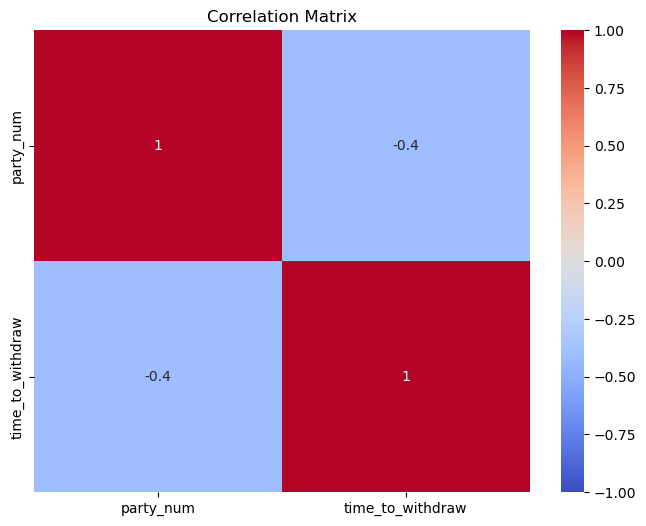

In [70]:
# Convert categorical variables to numerical values (for correlation analysis)
data['party_num'] = data['party'].astype('category').cat.codes

# If you have more numerical columns, you can calculate correlations
correlation_matrix = data[['party_num', 'time_to_withdraw']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

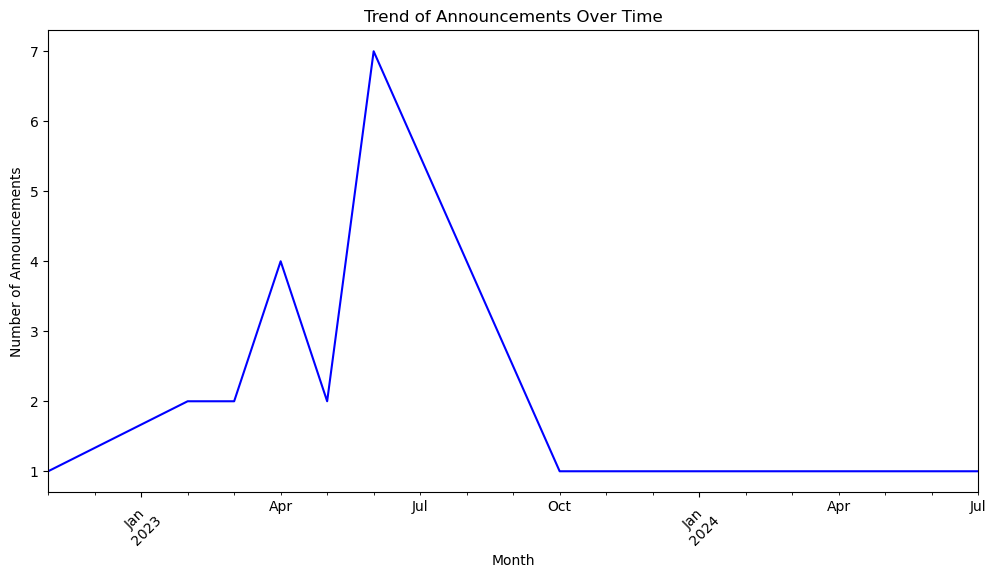

In [72]:
# Group the data by month and count the number of announcements
monthly_announcements = data['date_announced'].dt.to_period('M').value_counts().sort_index()

# Plotting the time series of announcements
plt.figure(figsize=(12, 6))
monthly_announcements.plot(kind='line', color='blue')
plt.title('Trend of Announcements Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=45)
plt.show()

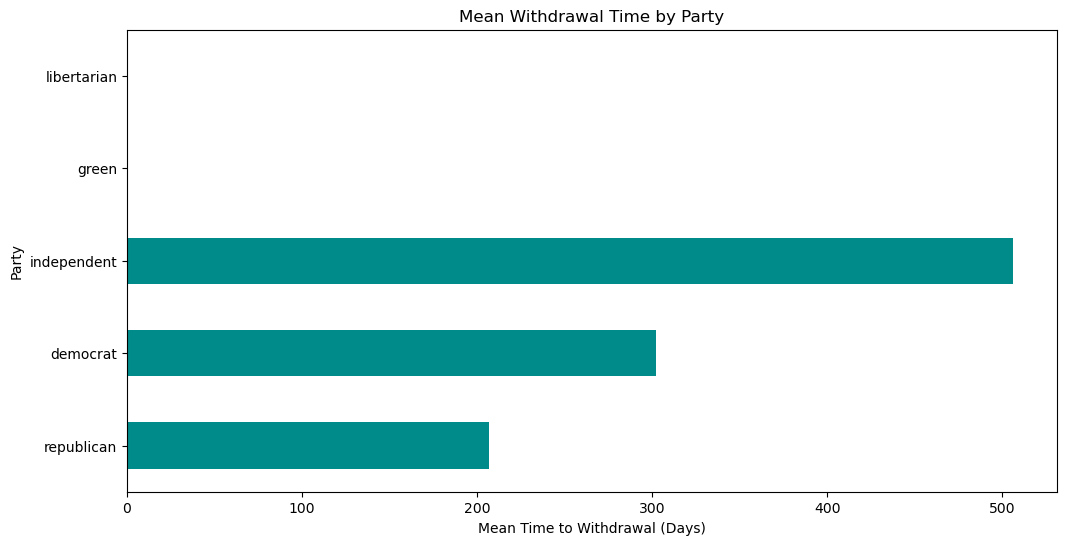

In [74]:
# Group by party and calculate the mean withdrawal time for each
party_withdrawal_time = data.groupby('party')['time_to_withdraw'].mean()

# Bar plot of mean withdrawal time by party
plt.figure(figsize=(12, 6))
party_withdrawal_time.sort_values().plot(kind='barh', color='darkcyan')
plt.title('Mean Withdrawal Time by Party')
plt.xlabel('Mean Time to Withdrawal (Days)')
plt.ylabel('Party')
plt.show()

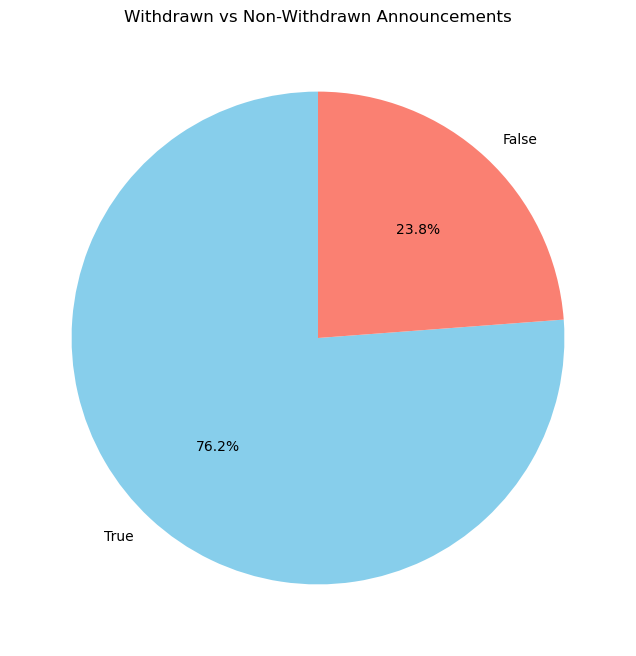

In [76]:
# Calculate the counts of withdrawn vs non-withdrawn
withdrawn_counts = data['withdrawn'].value_counts()

# Plot pie chart for withdrawn vs non-withdrawn
plt.figure(figsize=(8, 8))
withdrawn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Withdrawn vs Non-Withdrawn Announcements')
plt.ylabel('')
plt.show()

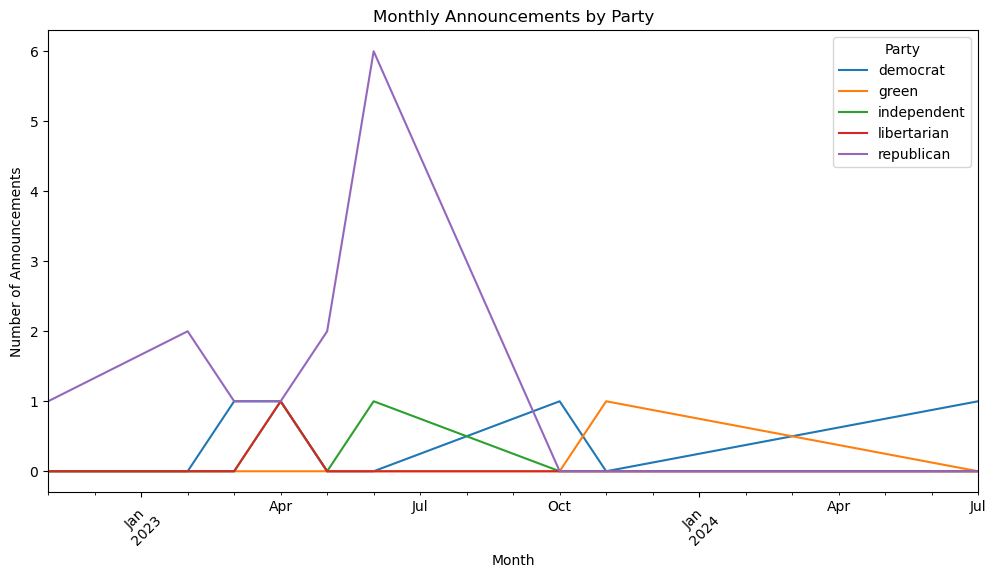

In [78]:
# Group by year and month, then count announcements for each party
monthly_party_announcements = data.groupby([data['date_announced'].dt.to_period('M'), 'party']).size().unstack().fillna(0)

# Plot the announcements by party over time
monthly_party_announcements.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Announcements by Party')
plt.xlabel('Month')
plt.ylabel('Number of Announcements')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.show()

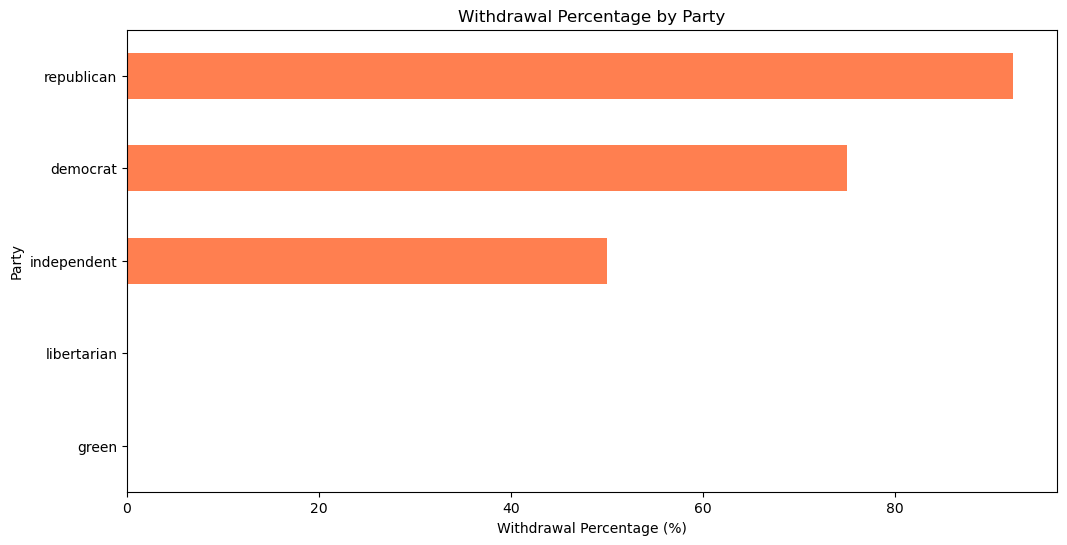

In [80]:
# Calculate the withdrawal percentage by party
withdrawal_percentage = data.groupby('party')['withdrawn'].mean() * 100

# Bar plot for the withdrawal percentage by party
plt.figure(figsize=(12, 6))
withdrawal_percentage.sort_values().plot(kind='barh', color='coral')
plt.title('Withdrawal Percentage by Party')
plt.xlabel('Withdrawal Percentage (%)')
plt.ylabel('Party')
plt.show()

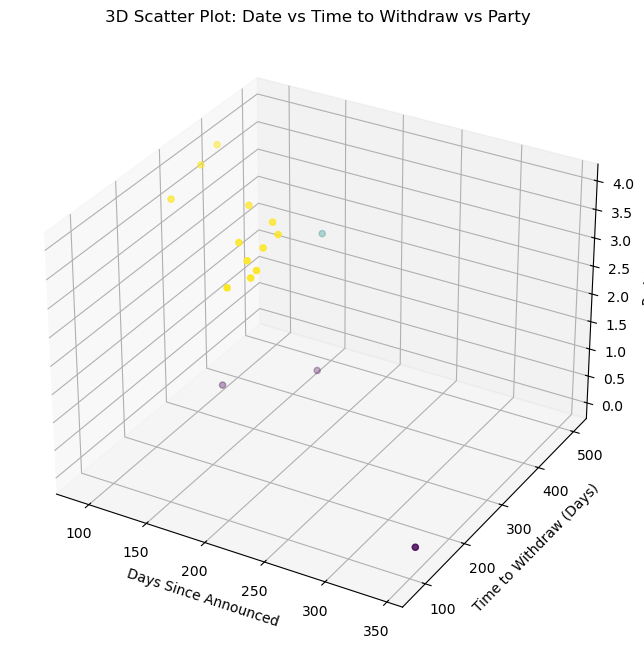

In [86]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Convert 'date_announced' to datetime format if it is not already
data['date_announced'] = pd.to_datetime(data['date_announced'])

# Convert 'date_announced' into numerical values (days since the earliest date)
min_date = data['date_announced'].min()
data['days_since_announced'] = (data['date_announced'] - min_date).dt.days

# Convert party to numeric values
party_num = data['party'].astype('category').cat.codes

# Plotting the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data with 'days_since_announced', 'time_to_withdraw' and 'party_num'
ax.scatter(data['days_since_announced'], data['time_to_withdraw'], party_num, c=party_num, cmap='viridis')

# Label the axes
ax.set_xlabel('Days Since Announced')
ax.set_ylabel('Time to Withdraw (Days)')
ax.set_zlabel('Party')

# Show the plot
plt.title('3D Scatter Plot: Date vs Time to Withdraw vs Party')
plt.show()

TypeError: can only concatenate str (not "int") to str

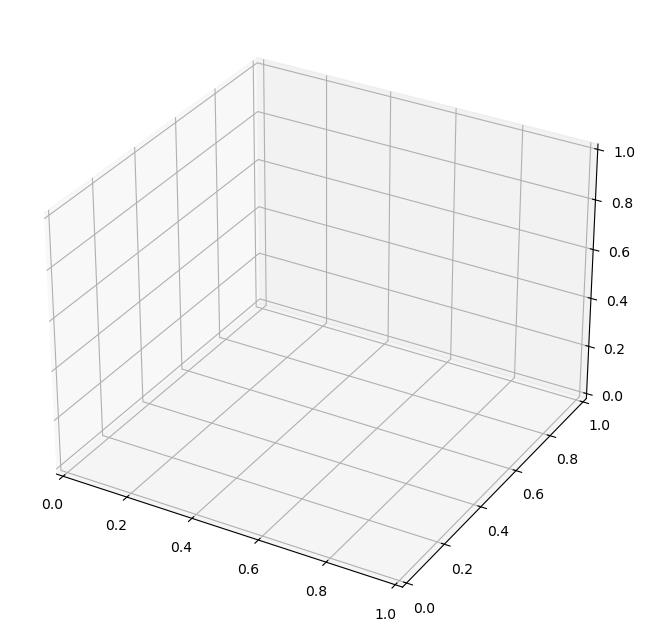

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert 'date_announced' to datetime format if it is not already
data['date_announced'] = pd.to_datetime(data['date_announced'])

# Convert 'date_announced' into numerical values (days since the earliest date)
min_date = data['date_announced'].min()
data['days_since_announced'] = (data['date_announced'] - min_date).dt.days

# Convert party to numeric values (categorical codes)
data['party_code'] = data['party'].astype('category').cat.codes

# Prepare data for 3D bar plot
dates = data['days_since_announced'].unique()  # Unique dates of announcements
parties = data['party'].unique()  # Unique parties

# Create a grid for the bar plot
X, Y = np.meshgrid(dates, parties)
Z = np.zeros_like(X, dtype=int)

# Populate Z with the count of withdrawals for each (date, party)
for i, date in enumerate(dates):
    for j, party in enumerate(parties):
        filtered_data = data[(data['days_since_announced'] == date) & (data['party'] == party)]
        Z[j, i] = len(filtered_data)

# Create the 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Bar width and depth
dx = np.ones_like(Z)
dy = np.ones_like(Z)
dz = Z

# Create bars with numeric party values (Y should be numeric now)
ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(Z.flatten()), dx.flatten(), dy.flatten(), dz.flatten(), color='blue')

# Label axes
ax.set_xlabel('Days Since Announced')
ax.set_ylabel('Party')
ax.set_zlabel('Number of Withdrawals')

# Rotate the plot to view from different angles
ax.view_init(elev=30, azim=45)

plt.title('3D Bar Plot: Number of Withdrawals by Party and Date')
plt.show()

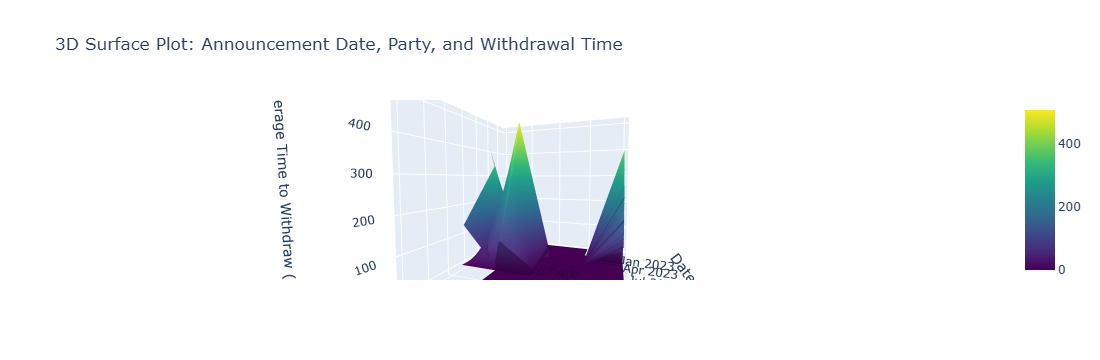

In [94]:
import plotly.graph_objects as go

# Prepare the data for the Plotly plot
party_num = data['party'].astype('category').cat.codes  # Convert party names to numeric codes
dates = data['date_announced'].dt.date.unique()  # Unique dates of announcements
parties = data['party'].unique()  # Unique parties

# Create a meshgrid
X, Y = np.meshgrid(dates, parties)
Z = np.zeros_like(X, dtype=float)

# Populate Z with the withdrawal time (time_to_withdraw) for each (date, party)
for i, date in enumerate(dates):
    for j, party in enumerate(parties):
        filtered_data = data[(data['date_announced'].dt.date == date) & (data['party'] == party)]
        if not filtered_data.empty:
            Z[j, i] = filtered_data['time_to_withdraw'].mean()

# Plotly 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

# Update layout for better viewing
fig.update_layout(
    title='3D Surface Plot: Announcement Date, Party, and Withdrawal Time',
    scene=dict(
        xaxis_title='Date Announced',
        yaxis_title='Party',
        zaxis_title='Average Time to Withdraw (Days)'
    )
)

fig.show()

In [100]:
# Impute missing values using the mean of the column
data['time_to_withdraw'] = data['time_to_withdraw'].fillna(data['time_to_withdraw'].mean())

# Optionally, if 'party_num' has NaNs (e.g., if some parties weren't encoded as numbers), you can fill those too
data['party_num'] = data['party_num'].fillna(data['party_num'].mode()[0])  # Filling with mode (most frequent)

# Now apply KMeans
data_cluster = data[['party_num', 'time_to_withdraw']]
kmeans = KMeans(n_clusters=4)  # You can adjust the number of clusters
data['cluster'] = kmeans.fit_predict(data_cluster)

# Now you can proceed with your clustering visualization or analysis

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



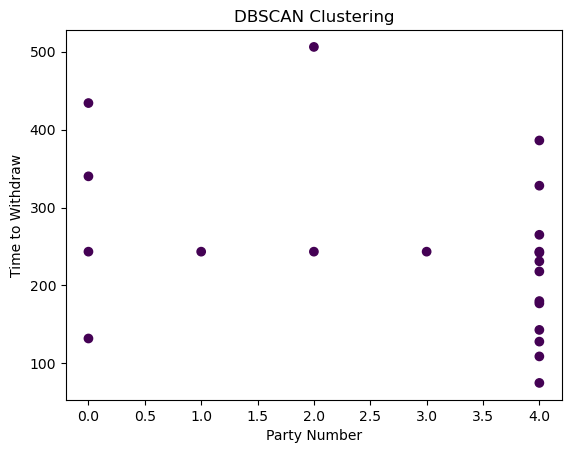

In [102]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(data_cluster)

# Visualize the clusters
plt.scatter(data['party_num'], data['time_to_withdraw'], c=data['dbscan_cluster'], cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Party Number")
plt.ylabel("Time to Withdraw")
plt.show()


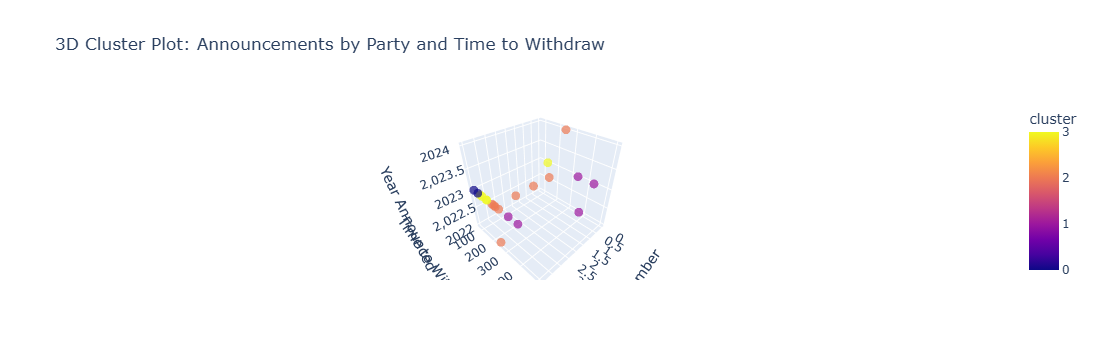

In [110]:
import plotly.express as px

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(data, 
                    x='party_num', 
                    y='time_to_withdraw', 
                    z='year_announced',  # You can adjust this axis as per your data
                    color='cluster',  # Color by the cluster
                    title='3D Cluster Plot: Announcements by Party and Time to Withdraw',
                    labels={'party_num': 'Party Number', 
                            'time_to_withdraw': 'Time to Withdraw (Days)', 
                            'year_announced': 'Year Announced'})
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.show()

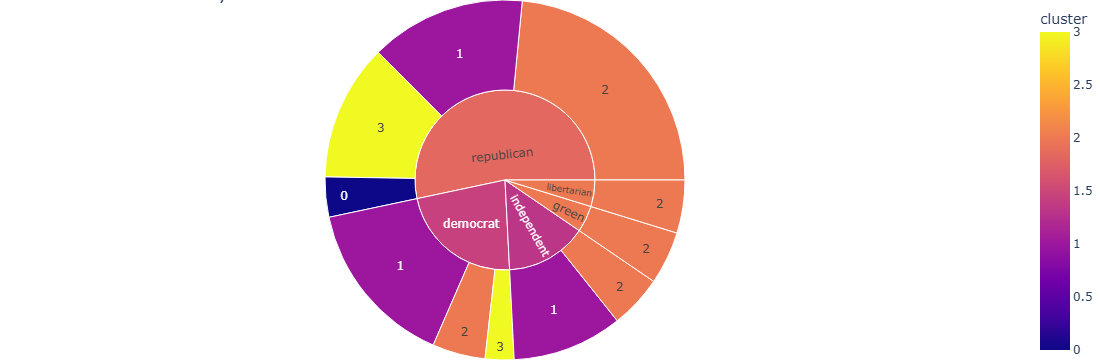

In [112]:
fig = px.sunburst(data, path=['party', 'cluster'], values='time_to_withdraw', 
                  color='cluster', title="Sunburst Plot: Party and Cluster Breakdown")
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))  # Removing borders for a cleaner look
fig.show()

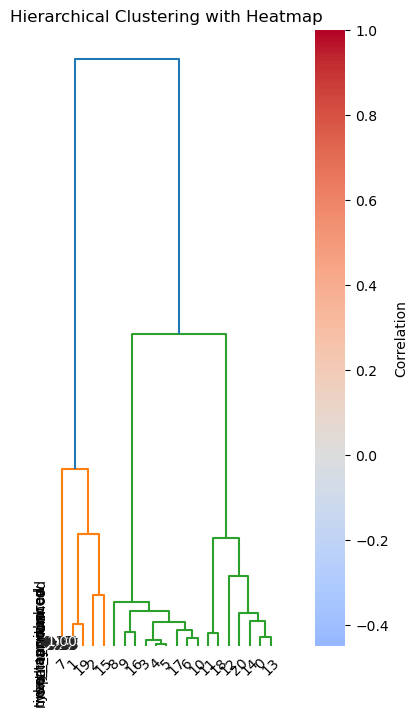

In [114]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix
Z = linkage(data_cluster, 'ward')

# Create a seaborn heatmap with hierarchical clustering
plt.figure(figsize=(10, 8))
sns.heatmap(data_cluster.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", 
            cbar_kws={'label': 'Correlation'}, linewidths=0.5, square=True)

# Create dendrogram
dendrogram(Z)
plt.title('Hierarchical Clustering with Heatmap')
plt.show()

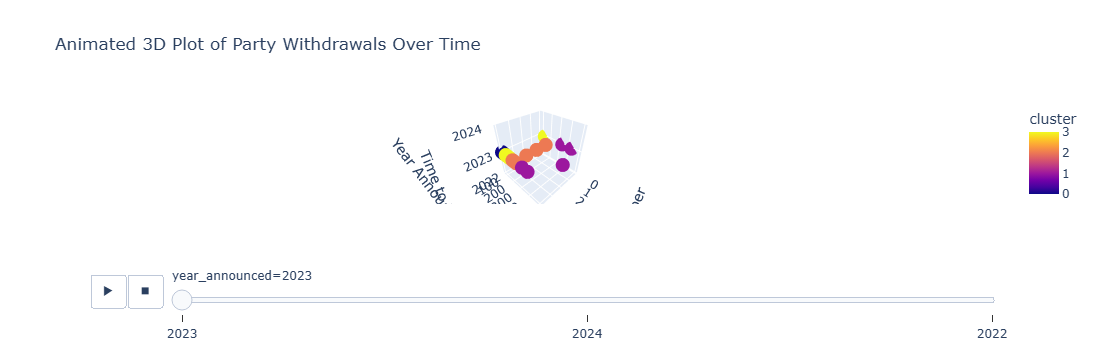

In [116]:
import plotly.express as px

# Assume 'year_announced' is a time variable or a similar variable
fig = px.scatter_3d(data, 
                    x='party_num', 
                    y='time_to_withdraw', 
                    z='year_announced', 
                    color='cluster', 
                    animation_frame='year_announced',  # Animated by 'year_announced'
                    title="Animated 3D Plot of Party Withdrawals Over Time")
fig.update_layout(scene=dict(xaxis_title='Party Number', 
                            yaxis_title='Time to Withdraw (Days)', 
                            zaxis_title='Year Announced'))
fig.show()

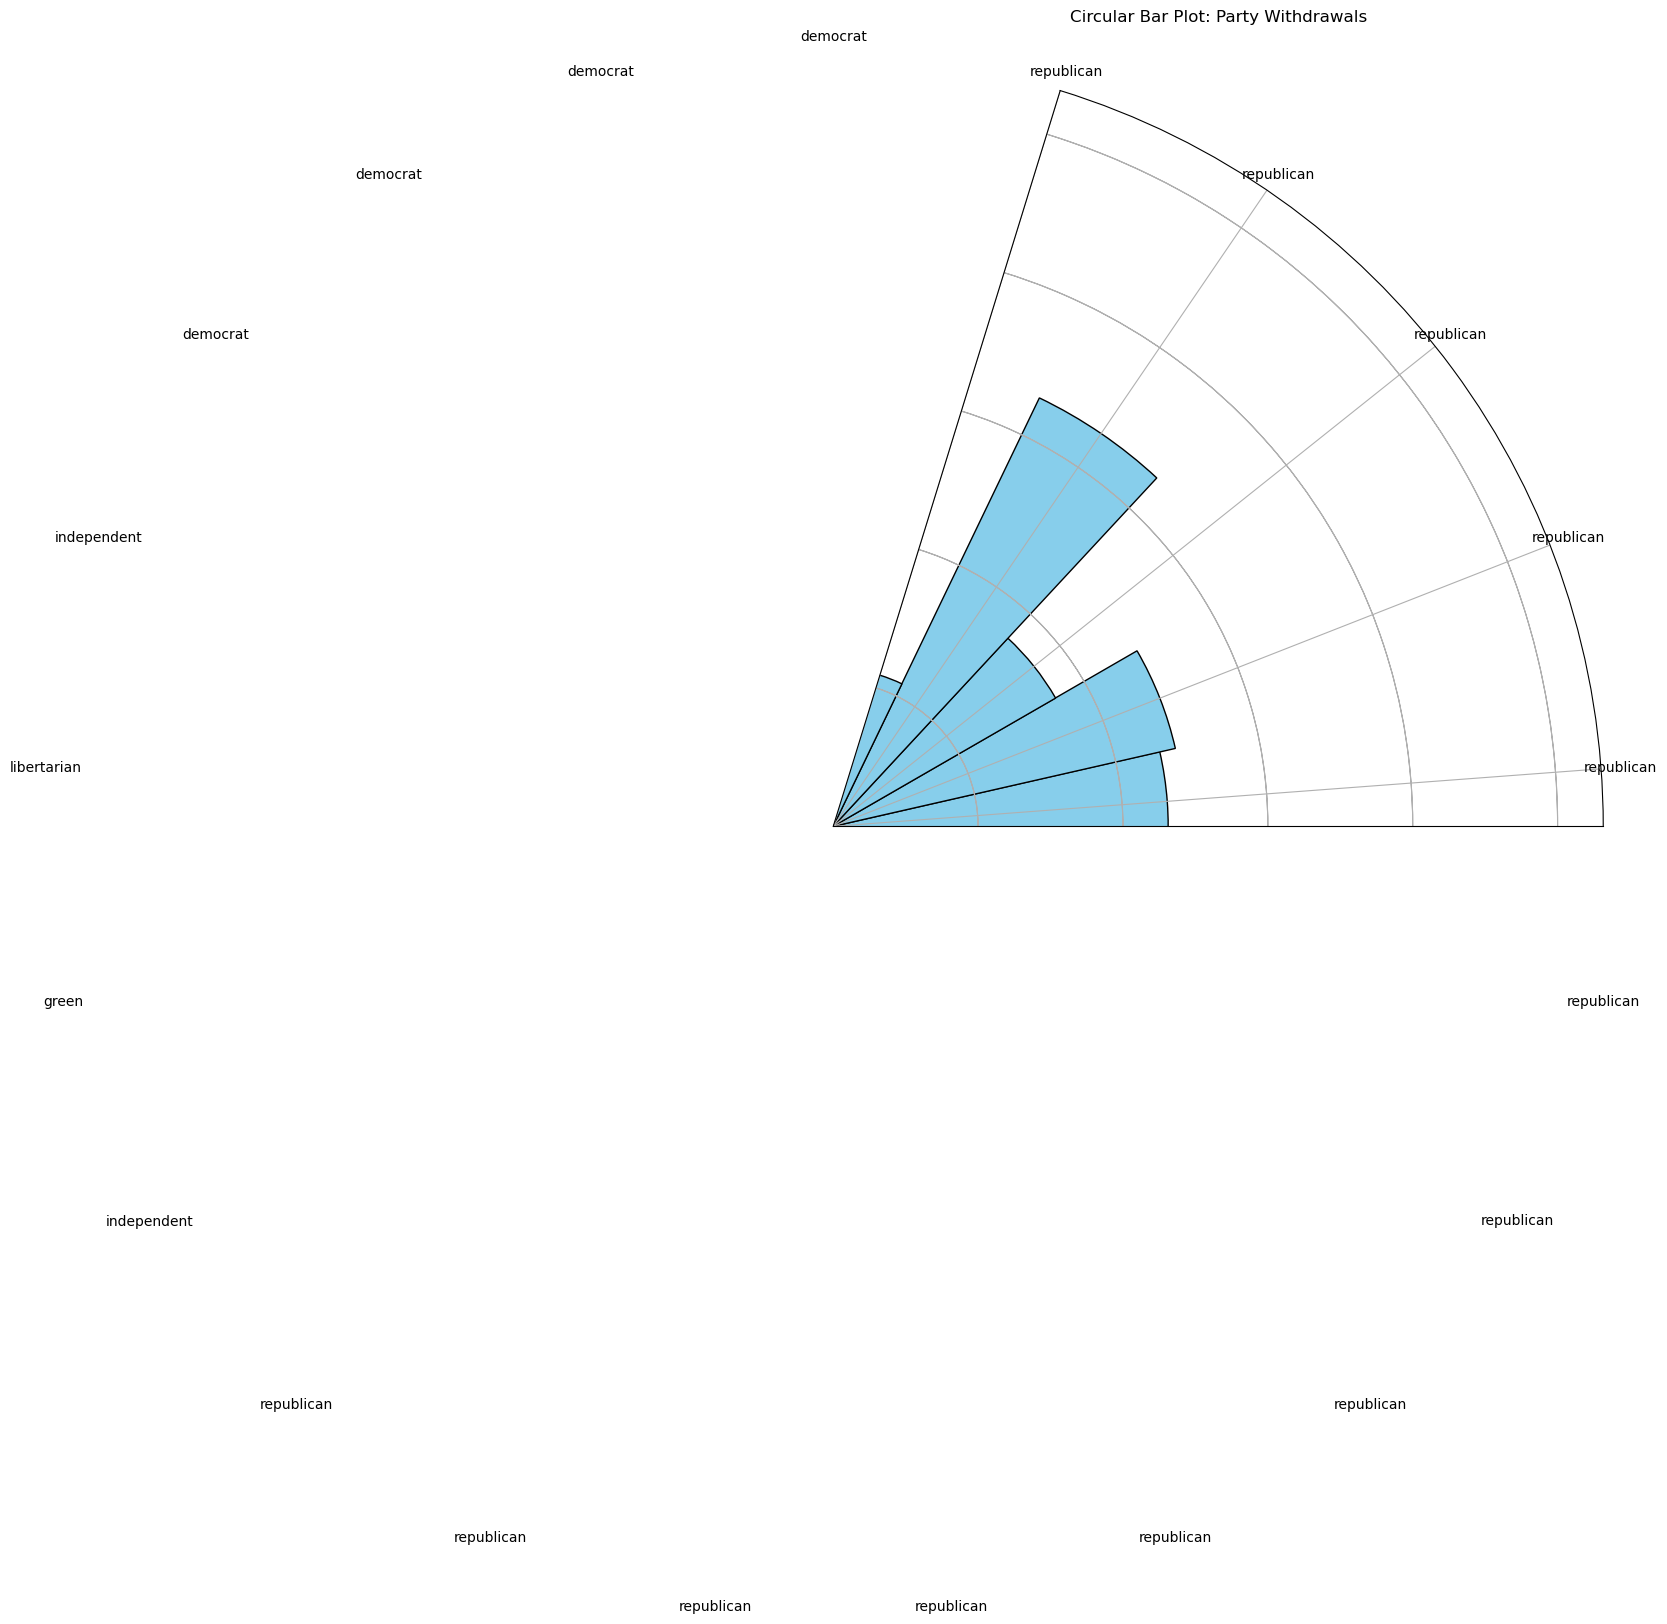

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (You can replace it with your own)
categories = data['party']
values = data['time_to_withdraw']

# Create a circular bar plot
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles += np.pi / 2  # Start at the top

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.bar(angles, values, width=0.3, bottom=0.2, color='skyblue', edgecolor='black')

ax.set_xticks(angles)
ax.set_xticklabels(categories, rotation=45)
ax.set_yticklabels([])  # Remove radial ticks
ax.set_title("Circular Bar Plot: Party Withdrawals")

plt.show()

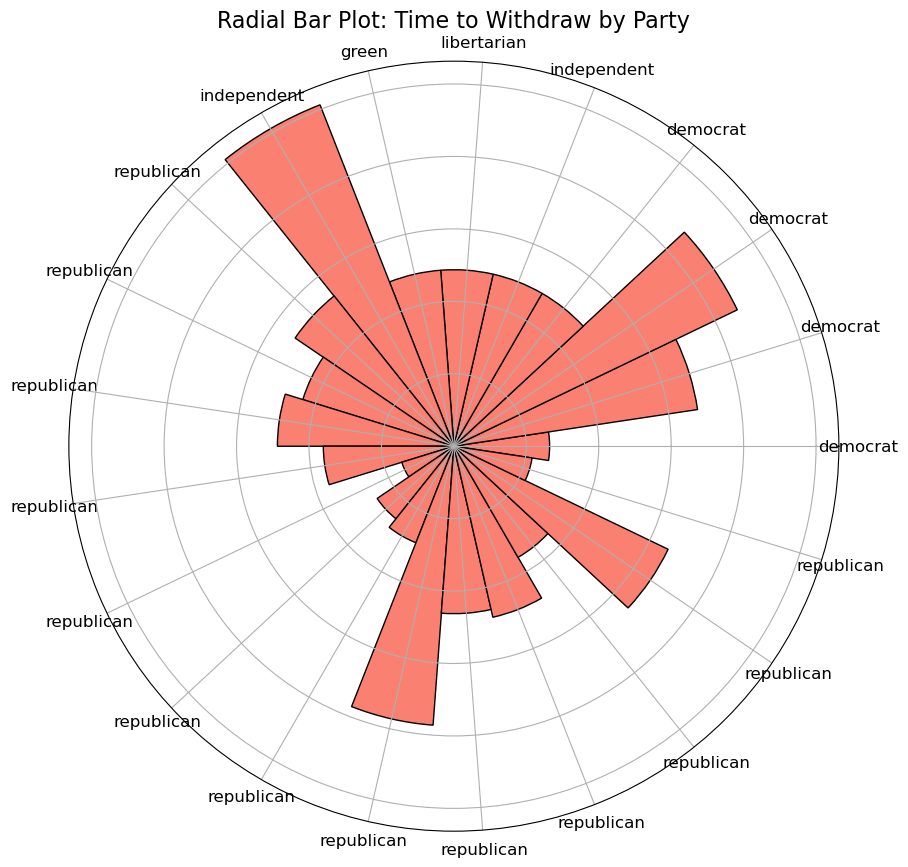

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (you can replace this with your own)
categories = data['party']  # Replace with your categorical data
values = data['time_to_withdraw']  # Replace with numerical values

# Number of categories
num_categories = len(categories)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False)

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
bars = ax.bar(angles, values, width=0.3, bottom=0.2, color='salmon', edgecolor='black')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(categories, rotation=45, fontsize=12)
ax.set_yticklabels([])

# Title
ax.set_title("Radial Bar Plot: Time to Withdraw by Party", fontsize=16)

plt.show()


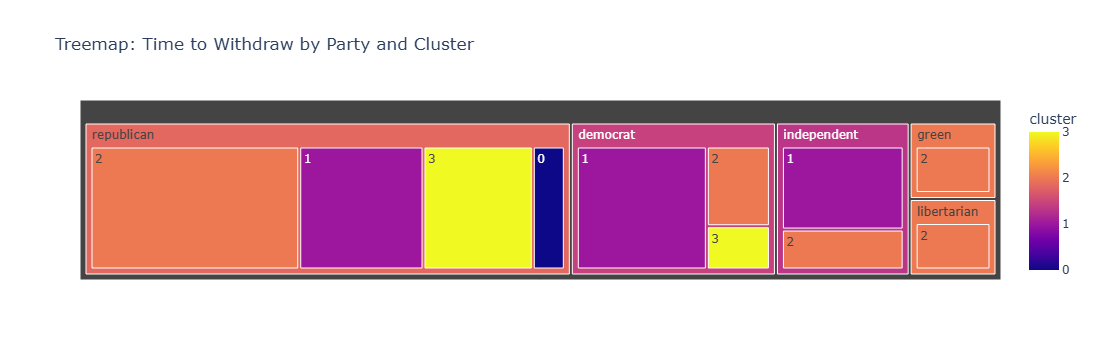

In [124]:
import plotly.express as px

# Assuming you have 'party', 'cluster', and 'time_to_withdraw' as part of your dataset
fig = px.treemap(data, 
                 path=['party', 'cluster'], 
                 values='time_to_withdraw', 
                 color='cluster', 
                 title="Treemap: Time to Withdraw by Party and Cluster")
fig.show()


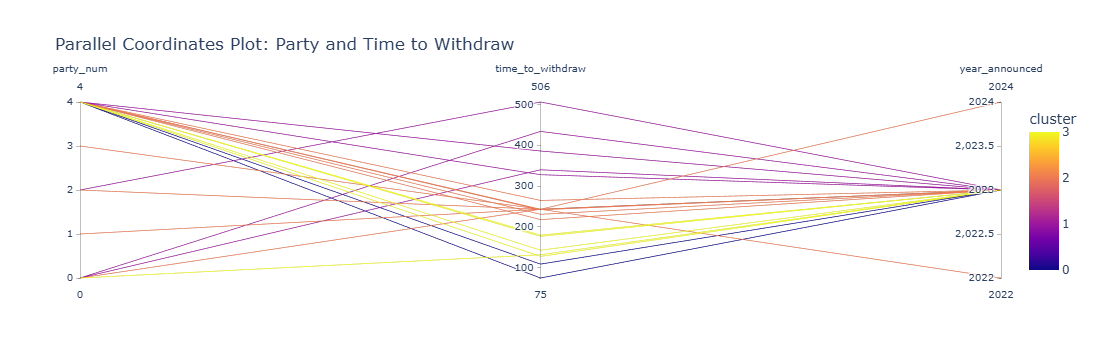

In [126]:
import plotly.express as px

# Assuming 'party_num', 'time_to_withdraw', 'year_announced' are columns in your dataset
fig = px.parallel_coordinates(data, 
                              color='cluster', 
                              dimensions=['party_num', 'time_to_withdraw', 'year_announced'],
                              title="Parallel Coordinates Plot: Party and Time to Withdraw")
fig.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17428\1965382904.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




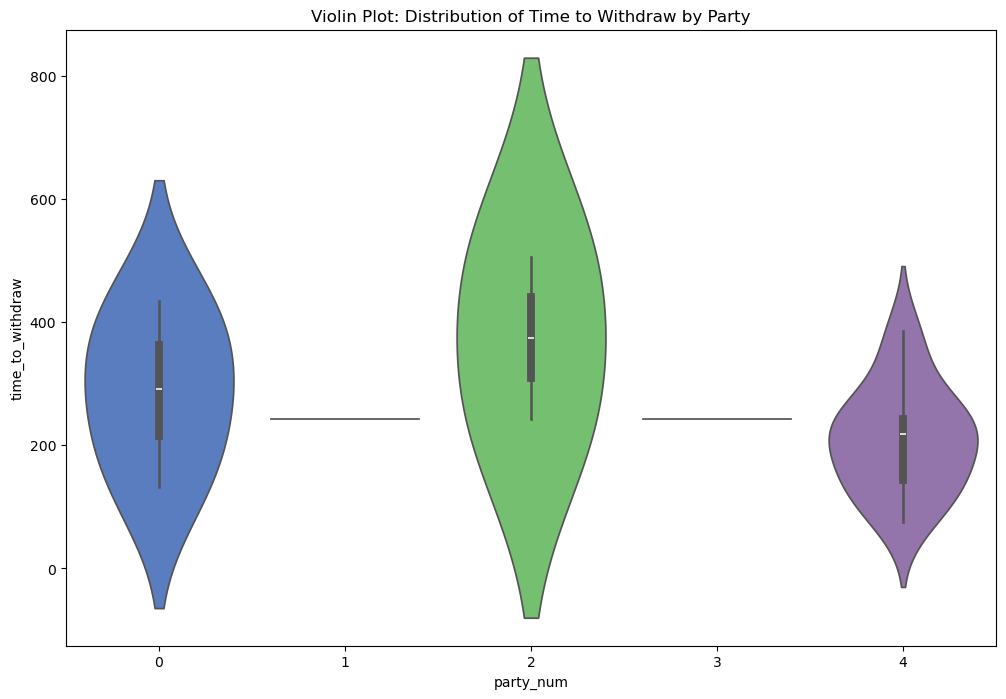

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to visualize distribution of 'time_to_withdraw' by 'party_num'
plt.figure(figsize=(12, 8))
sns.violinplot(x='party_num', y='time_to_withdraw', data=data, palette='muted')
plt.title("Violin Plot: Distribution of Time to Withdraw by Party")
plt.show()


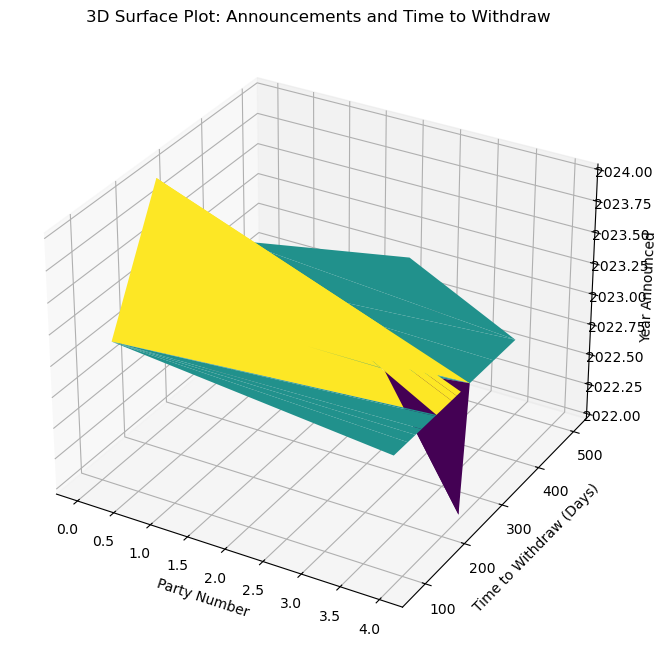

In [130]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create sample data (You can replace it with your actual data)
X = data['party_num']
Y = data['time_to_withdraw']
Z = data['year_announced']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(X, Y, Z, cmap='viridis', linewidth=0.2)
ax.set_xlabel('Party Number')
ax.set_ylabel('Time to Withdraw (Days)')
ax.set_zlabel('Year Announced')
ax.set_title("3D Surface Plot: Announcements and Time to Withdraw")

plt.show()


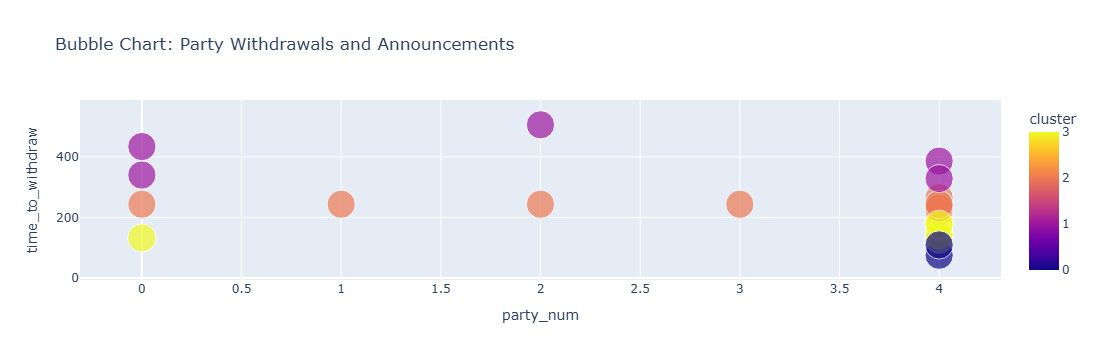

In [132]:
import plotly.express as px

fig = px.scatter(data, 
                 x='party_num', 
                 y='time_to_withdraw', 
                 size='year_announced',  # Bubble size based on a third dimension
                 color='cluster', 
                 hover_name='party', 
                 title="Bubble Chart: Party Withdrawals and Announcements")
fig.show()

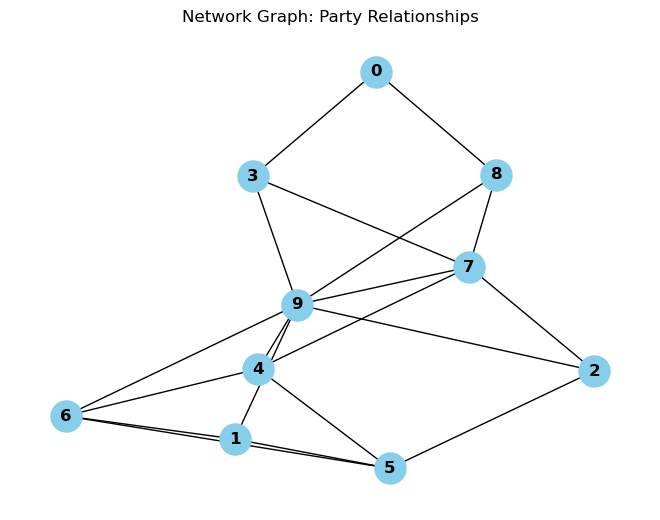

In [138]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(n=10, p=0.3)  # Sample network
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.title("Network Graph: Party Relationships")
plt.show()